<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-1/03_random_simulations_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Running random simulations

This notebook focuses on randomized numerical
simulations. We will use NumPy to analyze billions of random data points; these
random observations will allow us to learn hidden probabilities.

##Setup

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

##Simulating random coin flips and die rolls

We can carry out random simulations using the `np.random`
module. That module is useful for generating random values and simulating random processes.

For instance, calling `np.random.randint(1, 7)` produces a random
integer between 1 and 6. 

The method chooses from the six possible integers with
equal likelihood, thus simulating a single roll of a standard die.


In [2]:
# Simulating a randomly rolled die
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

The inconsistency could make it difficult to perfectly re-create
certain random simulations.

We need a way of ensuring that all our random
outputs can be reproduced at home. 

Conveniently, consistency can easily be
maintained by calling `np.random.seed(0)`; this method call makes sequences of randomly
chosen values reproducible.



In [3]:
# Seeding reproducible random die rolls
np.random.seed(0)

die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

Adjusting the inputted x into `np.random.randint(0, x)` allows us to simulate any number of discrete outcomes.

For instance, setting x to 52 will simulate a randomly
drawn card. Alternatively, setting x to 2 will simulate a single flip of an unbiased coin.

Let’s generate that coin flip by calling np.random.randint(0, 2); this method call
returns a random value equal to either 0 or 1. 

We assume that 0 stands for tails and 1
stands for heads.

In [4]:
np.random.seed(0)

def frequency_heads(coin_flip_sequence):
  total_heads = len([head for head in coin_flip_sequence if head == 1])
  return total_heads / len(coin_flip_sequence)

In [5]:
coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)

print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


The observed frequency is 0.8, which is quite disproportionate to the actual probability of heads. 

However, 10 coin flips will produce such extreme frequencies
approximately 10% of the time. More coin flips are required to estimate the
actual probability.

Let’s see what happens when we flip the coin 1,000 times.

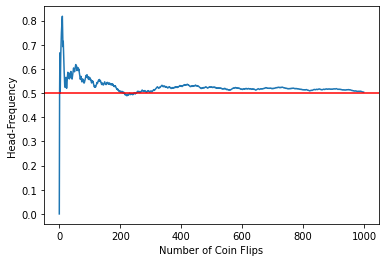

In [6]:
np.random.seed(0)

coin_flips = []
frequencies = []
for _ in range(1000):
  coin_flips.append(np.random.randint(0, 2))
  frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color="r")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Head-Frequency")
plt.show()

The probability of heads slowly converges to 0.5. Thus, the law of large numbers appears to hold up.

###Analyzing biased coin flips

We’ve simulated a sequence of unbiased coin flips, but what if we wish to simulate a coin that falls on heads 70% of the time? 

Well, we can generate that biased output by
calling `np.random.binomial(1, 0.7)`.

The binomial method name refers to the generic
coin-flip distribution, which mathematicians call the binomial distribution. The method
takes as input two parameters: the number of coin flips and the probability of the
desired coin-flip outcome.

In [7]:
# Simulating biased coin flips
np.random.seed(0)

print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flips == 1 else 'tails'}")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print(f"{head_count} heads were observed out of {number_coin_flips} biased coin flips")

Let's flip the biased coin once.
Biased coin landed on tails

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


Let’s generate a sequence of 1,000 biased coin flips. We then check if the frequency
converges to 0.7.

In [8]:
np.random.seed(0)

# Computing coin-flip-frequency convergence
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


The frequency of heads approximates 0.7 but is not actually equal to 0.7. In fact, the
frequency value is 0.003 units smaller than the true probability of heads.

Will all the frequencies
be lower than 0.7? 

Will certain frequencies hit the exact value of 0.7? 

We’ll find out by
executing `np.random.binomial(1000, 0.7)` over five looped iterations.

In [9]:
np.random.seed(0)

# Recomputing coin-flip-frequency convergence
assert np.random.binomial(1000, 0.7) / 1000 == 0.697

for i in range(1, 6):
  head_count = np.random.binomial(1000, 0.7)
  frequency = head_count / 1000
  print(f"Frequency at iteration {i} is {frequency}")
  if frequency == 0.7:
    print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


The observed frequency appears to fluctuate over every sampling of 1,000 coin
flips. 

It seems that **even though the law of large numbers allows us to approximate the actual probability, some uncertainty still remains**. 

Data science is somewhat messy, and
we cannot always be certain of the conclusions we draw from our data.

Nevertheless, our uncertainty can be measured and contained using what mathematicians call a confidence
interval.

##Computing confidence intervals

Suppose we’re handed a biased coin whose bias we don’t know. We flip the coin 1,000 times and observe a frequency of 0.709. 

We know the frequency approximates the
actual probability, but by how much?

More precisely, what are the chances of the
actual probability falling within an interval close to 0.709 (such as an interval between
0.7 and 0.71)? 

To find out, we must do additional sampling.

The sampling produced some fluctuations in the frequency. 

Let’s explore these fluctuations
by increasing our frequency count from 5 to 500.

In [10]:
np.random.seed(0)

# Computing frequencies with 500 flips per sample
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [13]:
np.random.seed(0)

# Optimizing the coin-flip-frequency computation
head_count_array = np.random.binomial(1000, 0.7, size=500)

The output is not a Python list but a NumPy array data structure.

In [14]:
# Converting a NumPy array to a Python list
assert head_count_array.tolist() == head_count_list

In [15]:
# Converting a Python list to a NumPy array
new_array = np.array(head_count_list)

assert np.array_equal(new_array, head_count_array) == True

In [16]:
# Computing frequencies using NumPy
frequency_array = head_count_array / 1000

assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

We’ve converted our head-count array into a frequency array using a simple division
operation. 

Let’s explore the contents of frequency_array in greater detail.



In [17]:
# Printing a NumPy frequency array
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


The sampled frequencies fluctuate from 0.69 to approximately 0.731.

Let’s extract the minimum and maximum array values.

In [18]:
# Finding the largest and smallest frequency values
min_freq = frequency_array.min()
max_freq = frequency_array.max()

print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Somewhere in the frequency range of 0.656 to 0.733 lies the true probability of heads.
That interval span is noticeably large, with a more than 7% difference between the
largest and smallest sampled values.

Perhaps we can narrow the frequency range by
plotting all unique frequencies against their occurrence counts.

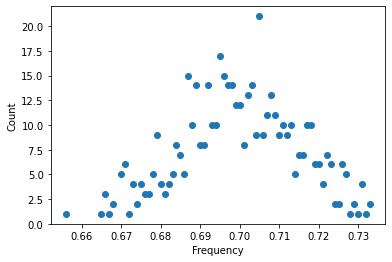

In [20]:
# Plotting measured frequencies
frequency_counts = defaultdict(int)
for frequency in frequency_array:
  frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

The visualization is informative: frequencies close to 0.7 occur more commonly than other, more distant values.

However, our plot is also flawed, since nearly identical frequencies
appear as overlapping dots in the chart. 

We should group these proximate
frequencies together instead of treating them as individual points.

###Binning similar points